# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Salsabila Azky Quri'al Qur'ani
- **Email:** salsabilaazky2422@gmail.com
- **ID Dicoding:** salsabila_azky_p3I5

## Menentukan Pertanyaan Bisnis

Pertanyaan 1: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara pengguna kasual dan terdaftar


Pertanyaan 2: Bagaimana pengaruh cuaca (kondisi suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


## Data Wrangling

Customers Dataset

## Gathering Data

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengambil data dari file day.csv dan membuat tabel (dataframe) untuk menampilkan data
- Mengambil data dari file hour.csv dan membuat tabel (dataframe) untuk menampilkan data

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Menampilkan datatype dari data tabel day dan hour menggunakan .info()
- Memeriksa apakah terdapat missing value, duplikasi menggunakan isna() dan duplicated()

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan fungsi .info() sebelumnya terdapat tipe data yang tidak sesuai yaitu dteday yang seharusnya bertipe data datetime.
- Pengubahan tipe data menggunakan fungsi pd.to_datetime.

## Exploratory Data Analysis (EDA)

### Explore User Distribution

In [13]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [15]:
#Rekapitulasi Pengguna Kasual

casual_user = day_df.groupby(by="casual").agg({
    "cnt": ["max", "min", "mean", "std"]
})

print(casual_user)

         cnt                          
         max   min    mean         std
casual                                
2         22    22    22.0         NaN
9        683   441   562.0  171.119841
15       431   431   431.0         NaN
25      1162  1162  1162.0         NaN
34       506   506   506.0         NaN
...      ...   ...     ...         ...
3155    7836  7836  7836.0         NaN
3160    8714  8714  8714.0         NaN
3252    6857  6857  6857.0         NaN
3283    6591  6591  6591.0         NaN
3410    8294  8294  8294.0         NaN

[606 rows x 4 columns]




*   Menampilkan kumpulan data Pengguna kasual dengan menggunakan fungsi groupby



In [16]:
#Rekapitulasi Pengguna Terdaftar

reg_user = day_df.groupby(by="registered").agg({
    "cnt": ["max", "min", "mean", "std"]
})

print(reg_user)

             cnt                  
             max   min    mean std
registered                        
20            22    22    22.0 NaN
416          431   431   431.0 NaN
432          441   441   441.0 NaN
451          754   754   754.0 NaN
472          506   506   506.0 NaN
...          ...   ...     ...  ..
6844        7572  7572  7572.0 NaN
6898        7693  7693  7693.0 NaN
6911        7691  7691  7691.0 NaN
6917        8167  8167  8167.0 NaN
6946        7733  7733  7733.0 NaN

[679 rows x 4 columns]




*   Menampilkan kumpulan data Pengguna terdaftar dengan menggunakan fungsi groupby



In [17]:
temp_group = day_df.groupby(pd.cut(day_df['temp'], bins=5), observed=True).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Grouping by humidity (hum)
if_hum = day_df.groupby(pd.cut(day_df['hum'], bins=5), observed=True).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Grouping by windspeed
if_wind = day_df.groupby(pd.cut(day_df['windspeed'], bins=5), observed=True).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

print(temp_group)
print(if_hum)
print(if_wind)

             temp       casual   registered
0  (0.0583, 0.22]   105.441860  1465.720930
1    (0.22, 0.38]   405.458763  2746.556701
2   (0.38, 0.541]   864.791908  3721.005780
3  (0.541, 0.701]  1204.036082  4470.922680
4  (0.701, 0.862]  1209.700787  4454.417323
                  hum      casual   registered
0  (-0.000973, 0.194]  289.000000   840.000000
1      (0.194, 0.389]  931.809524  3607.571429
2      (0.389, 0.584]  862.048507  3708.093284
3      (0.584, 0.778]  915.264264  3890.273273
4      (0.778, 0.972]  598.682243  2859.747664
         windspeed      casual   registered
0  (0.0219, 0.119]  960.008000  4090.904000
1   (0.119, 0.216]  889.530220  3789.052198
2   (0.216, 0.313]  821.435484  3367.091398
3    (0.313, 0.41]  425.918367  2746.387755
4    (0.41, 0.507]  367.142857  3033.142857


Menampilkan gabungan data rata-rata pengguna  yang menyewa berdasarkan kondisi suhu, kelembapan dan kecepatan angin

## Visualization & Explanatory Analysis

### Pertanyaan 1:

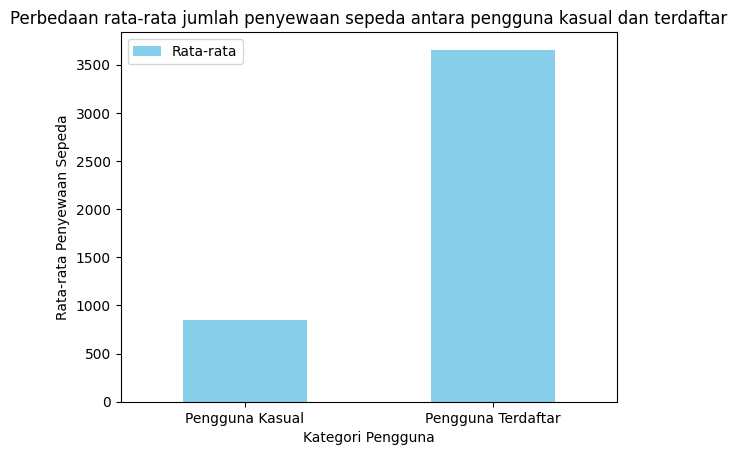

In [18]:
# Menghitung rata-rata jumlah penyewaan sepeda untuk pengguna kasual dan terdaftar
casual_mean = day_df['casual'].mean()
registered_mean = day_df['registered'].mean()

# Membuat dataframe baru dengan dua kategori: Kasual dan Terdaftar
combined_df = pd.DataFrame({
    'Kategori': ['Pengguna Kasual', 'Pengguna Terdaftar'],
    'Rata-rata': [casual_mean, registered_mean]
})

# Membuat bar chart
combined_df.set_index('Kategori').plot(kind='bar', color=['skyblue', 'purple'])

# Menambahkan judul dan label
plt.title('Perbedaan rata-rata jumlah penyewaan sepeda antara pengguna kasual dan terdaftar')
plt.xlabel('Kategori Pengguna')
plt.ylabel('Rata-rata Penyewaan Sepeda')

# Menampilkan legend
plt.legend()

# Menampilkan grafik
plt.xticks(rotation=0)
plt.show()

**Insight**

*   Pertanyaan 1: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara pengguna kasual dan terdaftar

Pada diagram menampilkan perbedaan rata-rata pengguna kasual dan terdaftar dalam meminjam sepeda. Dimana pengguna terdafatar lebih banyak menyewa sepeda dibandingkan dengan pengguna kasual.


### Pertanyaan 2:

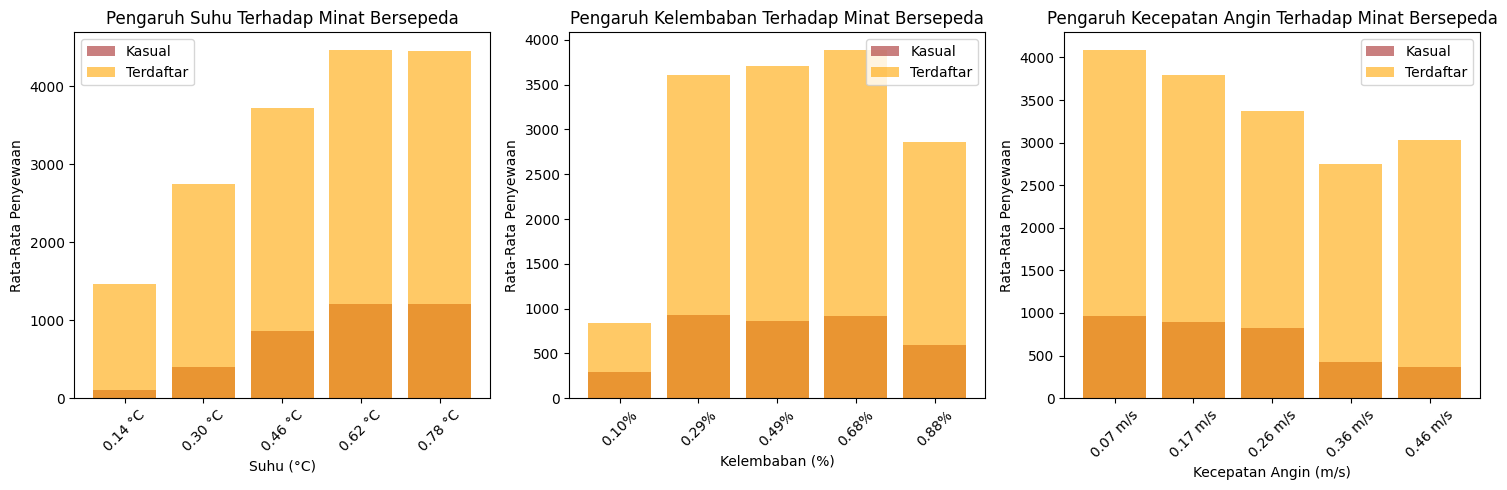

In [20]:
# Histogram untuk pengaruh suhu terhadap pengguna kasual dan terdaftar
plt.figure(figsize=(15, 5))

# Suhu
plt.subplot(1, 3, 1)
# Menampilkan nilai rata-rata dari bin suhu untuk label X
temp_labels = [f'{(bin.left + bin.right) / 2:.2f} °C' for bin in temp_group['temp']]
plt.bar(temp_labels, temp_group['casual'], color='brown', alpha=0.6, label='Kasual')
plt.bar(temp_labels, temp_group['registered'], color='orange', alpha=0.6, label='Terdaftar')
plt.title('Pengaruh Suhu Terhadap Minat Bersepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=45)
plt.legend()

# Kelembapan
plt.subplot(1, 3, 2)
# Menampilkan nilai rata-rata dari bin kelembapan untuk label X
hum_labels = [f'{(bin.left + bin.right) / 2:.2f}%' for bin in if_hum['hum']]
plt.bar(hum_labels, if_hum['casual'], color='brown', alpha=0.6, label='Kasual')
plt.bar(hum_labels, if_hum['registered'], color='orange', alpha=0.6, label='Terdaftar')
plt.title('Pengaruh Kelembaban Terhadap Minat Bersepeda')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=45)
plt.legend()

# Kecepatan Angin
plt.subplot(1, 3, 3)
# Menampilkan nilai rata-rata dari bin kecepatan angin untuk label X
wind_labels = [f'{(bin.left + bin.right) / 2:.2f} m/s' for bin in if_wind['windspeed']]
plt.bar(wind_labels, if_wind['casual'], color='brown', alpha=0.6, label='Kasual')
plt.bar(wind_labels, if_wind['registered'], color='orange', alpha=0.6, label='Terdaftar')
plt.title('Pengaruh Kecepatan Angin Terhadap Minat Bersepeda')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 2: Bagaimana pengaruh cuaca (kondisi suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar?
Berdasarkan diagram diatas, penyewaan sepeda tertinggi saat suhu berada di
angka 0,62°C. adapun berdasarkan persentase kelembaban, penyewaan sepeda tertinggi terjadi saat 0,68%.Sedangkan berdasarkan kecepatan angin, penyewaan tertinggi saat 0,7m/s.

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara pengguna kasual dan terdaftar?
Berdasarkan analisis data yang telah dilakukan, dapat disimpulkan bahwa terjadi kesenjangan pada minat sewa antara pengguna kasual dengan pengguna terdaftar,dimana pengguna terdaftar lebih sering menyewa sepeda dibanding pengguna kasual.


Pertanyaan 2: Bagaimana pengaruh cuaca (kondisi suhu, kelembapan, dan kecepatan angin) terhadap jumlah penyewaan sepeda oleh pengguna kasual dan terdaftar?
Berdasarkan analisis data yang telah dilakukan, tanpa mempertimbangkan jenis cuaca yang terjadi pada hari-hari tertentu, minat menyewa sepeda setiap pengguna juga bergantung pada kondisi suhu, kelembapan, maupun kecepatan angin. Dimana jumlah penyewa rata-rata terbanyak terjadi pada saat suhu berada di titik 0.62°C, kelembapan berada di titik 0.68% dan kecepatan angin sebesar 0.07 m/s.